In [17]:
import os
import random
import pandas as pd
import pyiqa
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
image_folder = "koniq10k_512x384"
indicators_csv = "koniq10k_indicators.csv"
scores_csv = "koniq10k_scores_and_distributions.csv"

indicators_df = pd.read_csv(indicators_csv)
scores_df = pd.read_csv(scores_csv)

brisque_metric = pyiqa.create_metric("brisque")
niqe_metric = pyiqa.create_metric("niqe")
piqe_metric = pyiqa.create_metric("piqe")

In [19]:
results = {"image": [], "brisque": [], "niqe": [], "piqe": [], "actual_score": []}

all_images = [
    img
    for img in os.listdir(image_folder)
    if img.lower().endswith((".png", ".jpg", ".jpeg"))
]
random_images = random.sample(all_images, min(100, len(all_images)))

for image_name in tqdm(random_images):
    image_path = os.path.join(image_folder, image_name)

    try:
        brisque_score = brisque_metric(image_path).item()
        niqe_score = niqe_metric(image_path).item()
        piqe_score = piqe_metric(image_path).item()
    except Exception as e:
        print(f"Error processing {image_name}: {e}")
        continue

    actual_score_row = scores_df[scores_df["image_name"] == image_name]
    actual_score = (
        actual_score_row["MOS"].values[0] if not actual_score_row.empty else None
    )

    results["image"].append(image_name)
    results["brisque"].append(brisque_score)
    results["niqe"].append(niqe_score)
    results["piqe"].append(piqe_score)
    results["actual_score"].append(actual_score)

100%|██████████| 100/100 [00:09<00:00, 10.41it/s]


Quality Assessment Results:
            image    brisque      niqe       piqe  actual_score
0  6273784733.jpg  14.087585  4.773885  28.775942      2.553398
1  2576250575.jpg  31.263855  3.929431  54.578133      2.864865
2  4669754441.jpg  25.828308  3.088078  26.463478      3.778846
3  6419047435.jpg   2.008972  2.831977  36.889168      3.481132
4  3132104449.jpg  14.907410  2.768083  37.370079      3.606061


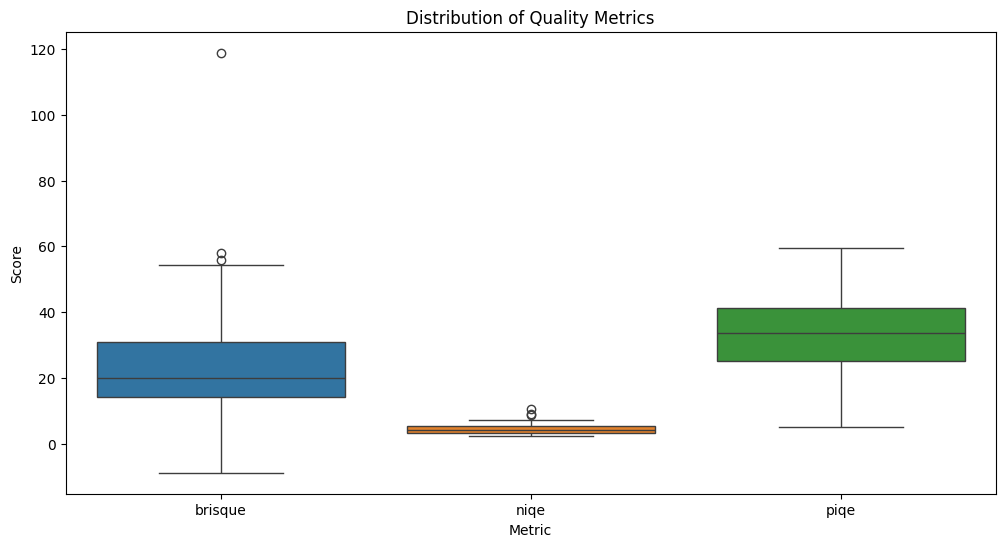

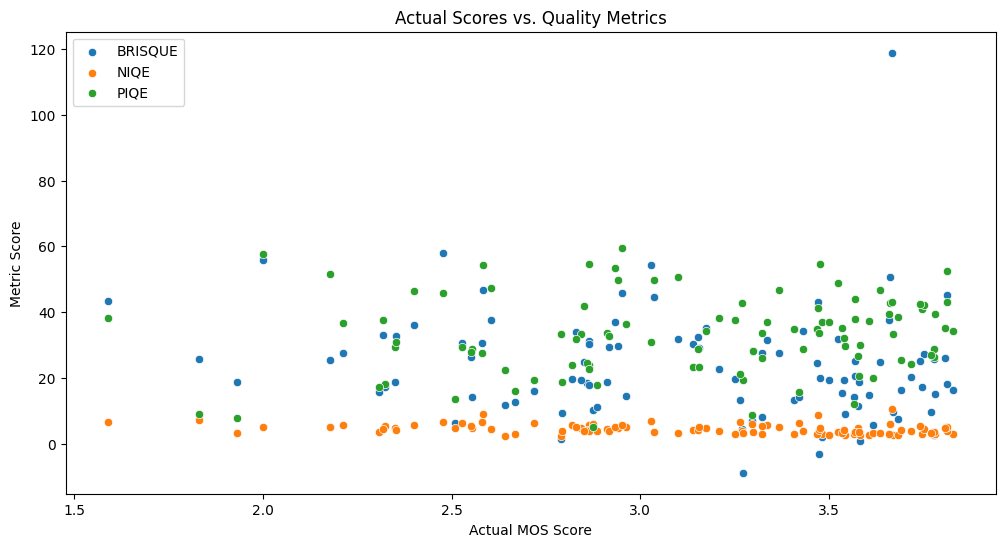

In [20]:
# Convert results to a DataFrame and visualize
results_df = pd.DataFrame(results)

print("Quality Assessment Results:")
print(results_df.head())

plt.figure(figsize=(12, 6))
sns.boxplot(data=results_df[["brisque", "niqe", "piqe"]])
plt.title("Distribution of Quality Metrics")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x=results_df["actual_score"], y=results_df["brisque"], label="BRISQUE")
sns.scatterplot(x=results_df["actual_score"], y=results_df["niqe"], label="NIQE")
sns.scatterplot(x=results_df["actual_score"], y=results_df["piqe"], label="PIQE")
plt.title("Actual Scores vs. Quality Metrics")
plt.xlabel("Actual MOS Score")
plt.ylabel("Metric Score")
plt.legend()
plt.show()